In [1]:
import pandas as pd
import numpy as np

import geopy

import matplotlib.pyplot as plt
import seaborn as sns

# Configure image format to be ‘svg’
%config InlineBackend.figure_format = 'svg'

# allow visuals to render within notebook
%matplotlib inline 

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
def read_turnstile_data(dates):
    '''
    Read in NYC MTA turnstile data from the web for the specified week(s) and create
    a contiguous Pandas dataframe
    
    INPUTS:
       dates (list of string) : A list of string(s) of the form '<2-digit-year><2-digit-month><2-digit-day>'
                                (e.g. '190504' for the MTA data file labeled 'May 04, 2019')
                                
    RETURNS:
       df (Pandas dataframe)  : A Pandas dataframe with all the MTA data specified by the date file(s) in 
                                the dates list
    '''
    
    for i, date in enumerate(dates):
        df_temp = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_" + date + ".txt")
        if i == 0:
            df = df_temp.copy(deep=True)
        else:
            df = pd.concat([df, df_temp], axis=0)
    df.reset_index(drop=True, inplace=True)
    
    # Fix column names
    new_col_names = [col.strip() for col in df.columns]
    df.set_axis(labels=new_col_names, axis=1, inplace=True)
    
    # Add a 'DATETIME' column
    df['DATETIME'] = pd.to_datetime(df['DATE'] + ' ' + df['TIME'])

    return df

In [4]:
# 2019 MTA Data (all of May and June)

dates = ['190504', '190511', '190518', '190525', '190601', '190608', '190615', '190622', '190629', '190706']

df_2019 = read_turnstile_data(dates)

# Since we'll be working with previous day differences, retain last day of April through the last day of June
df_2019 = df_2019[(df_2019['DATETIME'] >= pd.Timestamp('2019-04-30 00:00:00', tz=None)) &
                  (df_2019['DATETIME'] < pd.Timestamp('2019-07-01 00:00:00', tz=None))]

print(df_2019.shape)
display(df_2019.head())
display(df_2019.tail())

(1819670, 12)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
18,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2019,00:00:00,REGULAR,7038242,2385765,2019-04-30 00:00:00
19,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2019,04:00:00,REGULAR,7038261,2385769,2019-04-30 04:00:00
20,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2019,08:00:00,REGULAR,7038308,2385866,2019-04-30 08:00:00
21,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2019,12:00:00,REGULAR,7038474,2386080,2019-04-30 12:00:00
22,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2019,16:00:00,REGULAR,7038775,2386147,2019-04-30 16:00:00


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
2059672,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/30/2019,05:00:00,REGULAR,5554,379,2019-06-30 05:00:00
2059673,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/30/2019,09:00:00,REGULAR,5554,379,2019-06-30 09:00:00
2059674,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/30/2019,13:00:00,REGULAR,5554,379,2019-06-30 13:00:00
2059675,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/30/2019,17:00:00,REGULAR,5554,379,2019-06-30 17:00:00
2059676,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/30/2019,21:00:00,REGULAR,5554,379,2019-06-30 21:00:00


In [5]:
# 2021 MTA Data (all of May and June)

dates = ['210501', '210508', '210515', '210522', '210529', '210605', '210612', '210619', '210626', '210703']

df_2021 = read_turnstile_data(dates)

# Since we'll be working with previous day differences, retain last day of April through the last day of June
df_2021 = df_2021[(df_2021['DATETIME'] >= pd.Timestamp('2021-04-30 00:00:00', tz=None)) &
                  (df_2021['DATETIME'] < pd.Timestamp('2021-07-01 00:00:00', tz=None))]

print(df_2021.shape)
display(df_2021.head())
display(df_2021.tail())

(1853303, 12)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
36,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2021,00:00:00,REGULAR,7564048,2584088,2021-04-30 00:00:00
37,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2021,04:00:00,REGULAR,7564059,2584092,2021-04-30 04:00:00
38,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2021,08:00:00,REGULAR,7564073,2584149,2021-04-30 08:00:00
39,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2021,12:00:00,REGULAR,7564118,2584275,2021-04-30 12:00:00
40,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2021,16:00:00,REGULAR,7564286,2584326,2021-04-30 16:00:00


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
2092932,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/30/2021,05:00:00,REGULAR,5554,584,2021-06-30 05:00:00
2092933,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/30/2021,09:00:00,REGULAR,5554,584,2021-06-30 09:00:00
2092934,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/30/2021,13:00:00,REGULAR,5554,584,2021-06-30 13:00:00
2092935,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/30/2021,17:00:00,REGULAR,5554,584,2021-06-30 17:00:00
2092936,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/30/2021,21:00:00,REGULAR,5554,584,2021-06-30 21:00:00


In [6]:
df_2019[df_2019['STATION'] == '86 ST'].groupby(['STATION', 'LINENAME', 'DIVISION']).first()

C/A  UNIT       SCP        DATE      TIME  \
STATION LINENAME DIVISION                                               
86 ST   1        IRT       R164  R167  00-00-00  04/30/2019  01:00:00   
        456      IRT       R249  R179  01-00-00  04/30/2019  00:00:00   
        BC       IND       N043  R186  00-00-00  04/30/2019  00:00:00   
        N        BMT       D016  R397  00-00-00  04/30/2019  01:00:00   
        R        BMT       C025  R215  00-00-00  04/30/2019  00:00:00   

                              DESC  ENTRIES     EXITS            DATETIME  
STATION LINENAME DIVISION                                                  
86 ST   1        IRT       REGULAR   746643   1182378 2019-04-30 01:00:00  
        456      IRT       REGULAR  2655736  37564440 2019-04-30 00:00:00  
        BC       IND       REGULAR   932452   1009004 2019-04-30 00:00:00  
        N        BMT       REGULAR    31206     87051 2019-04-30 01:00:00  
        R        BMT       REGULAR   274206     95597 2019-04-30 00:00:00

In [7]:
df_2019[df_2019['STATION'] == '96 ST'].groupby(['STATION', 'LINENAME', 'DIVISION']).first()

C/A  UNIT       SCP        DATE      TIME  \
STATION LINENAME DIVISION                                                
96 ST   123      IRT       R168A  R168  00-00-00  04/30/2019  01:00:00   
        6        IRT        R251  R144  00-00-00  04/30/2019  01:00:00   
        BC       IND        N039  R251  01-00-00  04/30/2019  00:00:00   

                              DESC   ENTRIES     EXITS            DATETIME  
STATION LINENAME DIVISION                                                   
96 ST   123      IRT       REGULAR   1431092   1555222 2019-04-30 01:00:00  
        6        IRT       REGULAR  23090565  15036083 2019-04-30 01:00:00  
        BC       IND       REGULAR   2399506    816802 2019-04-30 00:00:00

In [8]:
df_2019[df_2019['STATION'] == 'FULTON ST'].groupby(['STATION', 'LINENAME', 'DIVISION']).first()

C/A  UNIT       SCP        DATE      TIME  \
STATION   LINENAME DIVISION                                                
FULTON ST 2345ACJZ IND       N095A  R014  01-00-00  04/30/2019  01:00:00   
                   IRT        R113  R028  01-01-00  04/30/2019  03:00:00   
          ACJZ2345 BMT        A077  R028  03-00-00  04/30/2019  03:00:00   
                   IND        N095  R014  00-03-00  04/30/2019  01:00:00   
          G        IND        N422  R318  00-00-00  04/30/2019  00:00:00   

                                DESC    ENTRIES      EXITS            DATETIME  
STATION   LINENAME DIVISION                                                     
FULTON ST 2345ACJZ IND       REGULAR     944695     381489 2019-04-30 01:00:00  
                   IRT       REGULAR  235202041  151226447 2019-04-30 03:00:00  
          ACJZ2345 BMT       REGULAR      49810      15396 2019-04-30 03:00:00  
                   IND       REGULAR    3653958    2076321 2019-04-30 01:00:00  
          G        IND       REGULAR    6257391    7861659 2019-04-30 00:00:00

In [9]:
df_2021.groupby(['STATION', 'LINENAME', 'DIVISION']).first().shape

(484, 9)

In [10]:
df_2021.groupby(['STATION', 'LINENAME']).first().shape

(478, 10)

In [11]:
df_2019.groupby(['STATION', 'LINENAME']).first().reset_index()['STATION'].value_counts().head(71)

23 ST              5
86 ST              5
125 ST             4
145 ST             3
50 ST              3
FULTON ST          3
FT HAMILTON PKY    3
18 AV              3
BAY PKWY           3
34 ST-PENN STA     3
CHAMBERS ST        3
7 AV               3
AVENUE U           3
CANAL ST           3
14 ST              3
28 ST              3
96 ST              3
CHURCH AV          3
TIMES SQ-42 ST     3
KINGS HWY          3
116 ST             3
111 ST             3
103 ST             3
59 ST              3
79 ST              2
SPRING ST          2
CATHEDRAL PKWY     2
8 AV               2
HALSEY ST          2
36 ST              2
BEDFORD PK BLVD    2
77 ST              2
42 ST-PORT AUTH    2
ROCKAWAY AV        2
RECTOR ST          2
NOSTRAND AV        2
72 ST              2
BERGEN ST          2
PROSPECT AV        2
BROADWAY           2
JAY ST-METROTEC    2
KINGSBRIDGE RD     2
PELHAM PKWY        2
PARK PLACE         2
59 ST COLUMBUS     2
GUN HILL RD        2
CLINTON-WASH AV    2
WALL ST      

In [12]:
df_2021.groupby(['STATION', 'LINENAME']).first().reset_index()['STATION'].value_counts().head(71)

23 ST              5
86 ST              5
125 ST             4
103 ST             3
145 ST             3
FT HAMILTON PKY    3
50 ST              3
59 ST              3
CHURCH AV          3
KINGS HWY          3
7 AV               3
CANAL ST           3
34 ST-PENN STA     3
TIMES SQ-42 ST     3
FULTON ST          3
18 AV              3
14 ST              3
96 ST              3
BAY PKWY           3
CHAMBERS ST        3
116 ST             3
111 ST             3
AVENUE U           3
28 ST              3
CATHEDRAL PKWY     2
SPRING ST          2
ROCKAWAY AV        2
42 ST-PORT AUTH    2
RECTOR ST          2
BROADWAY           2
PROSPECT AV        2
CLINTON-WASH AV    2
PARK PLACE         2
JAY ST-METROTEC    2
PELHAM PKWY        2
59 ST COLUMBUS     2
BOROUGH HALL       2
BERGEN ST          2
NOSTRAND AV        2
72 ST              2
BEDFORD PK BLVD    2
KINGSBRIDGE RD     2
77 ST              2
79 ST              2
8 AV               2
LORIMER ST         2
METROPOLITAN AV    2
ATL AV-BARCLA

In [13]:
multi_stations_2019 = df_2019.groupby(['STATION', 'LINENAME']) \
                             .first().reset_index()['STATION'].value_counts().head(71).index

multi_stations_2021 = df_2021.groupby(['STATION', 'LINENAME']) \
                             .first().reset_index()['STATION'].value_counts().head(71).index

print(np.setdiff1d(multi_stations_2019, multi_stations_2021))
print(np.setdiff1d(multi_stations_2021, multi_stations_2019))

['181 ST']
['GRAND ARMY PLAZ']


In [14]:
# For now, let's drop the data for any station names that appear to cover more than 1 station
#  NOTE: These are NOT exactly the same stations in 2019 vs. 2021 (see cell directly above)

print(df_2019.shape)
df_2019 = df_2019[~df_2019['STATION'].isin(multi_stations_2019)]
print(df_2019.shape)

(1819670, 12)
(1112131, 12)


In [15]:
print(df_2021.shape)
df_2021 = df_2021[~df_2021['STATION'].isin(multi_stations_2021)]
print(df_2021.shape)

(1853303, 12)
(1138221, 12)


In [16]:
# 2020 MTA Data (all of May and June)

# dates = ['200502', '200509', '200516', '200523', '200530', '200606', '200613', '200620', '200627', '200704']

In [17]:
print('# Stations in 2019 Data: ', df_2019['STATION'].unique().shape[0])
print('# Stations in 2021 Data: ', df_2021['STATION'].unique().shape[0])

# Stations in 2019 Data:  307
# Stations in 2021 Data:  308


In [18]:
stations_2019 = df_2019['STATION'].unique()
stations_2021 = df_2021['STATION'].unique()

np.setdiff1d(stations_2021, stations_2019)

array(['181 ST', 'ASTORIA BLVD'], dtype=object)

In [19]:
np.setdiff1d(stations_2019, stations_2021)

array(['GRAND ARMY PLAZ'], dtype=object)

In [20]:
# Drop '181 ST' & 'ASTORIA BLVD' station from df_2021 since there's no 2019 point of comparison


print(df_2021.shape)
df_2021 = df_2021[~df_2021['STATION'].isin(['181 ST', 'ASTORIA BLVD'])]
df_2021.reset_index(drop=True, inplace=True)
print(df_2021.shape)

(1138221, 12)
(1130044, 12)


In [21]:
# Drop 'GRAND ARMY PLAZ' station from df_2019 since there's no 2019 point of comparison

print(df_2019.shape)
df_2019 = df_2019[~df_2019['STATION'].isin(['GRAND ARMY PLAZ'])]
df_2019.reset_index(drop=True, inplace=True)
print(df_2019.shape)

(1112131, 12)
(1110631, 12)


## Check for Duplicate 'ENTRIES'

### Start with df_2019:

In [22]:
check = df_2019.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DATETIME'])['ENTRIES'] \
                        .count().sort_values(ascending=False)
check.reset_index().head(14)

,C/A,UNIT,SCP,STATION,LINENAME,DATETIME,ENTRIES
0,N045,R187,01-00-00,81 ST-MUSEUM,BC,2019-06-02 17:00:00,2
1,N045,R187,01-00-02,81 ST-MUSEUM,BC,2019-06-01 17:00:00,2
2,N525,R142,01-00-04,DELANCEY/ESSEX,FJMZ,2019-05-11 05:00:00,2
3,N525,R142,01-00-03,DELANCEY/ESSEX,FJMZ,2019-05-11 05:00:00,2
4,N045,R187,01-00-00,81 ST-MUSEUM,BC,2019-06-01 17:00:00,2
5,N045,R187,01-00-01,81 ST-MUSEUM,BC,2019-06-01 17:00:00,2
6,N045,R187,01-00-02,81 ST-MUSEUM,BC,2019-06-02 17:00:00,2
7,N045,R187,01-06-00,81 ST-MUSEUM,BC,2019-06-11 21:00:00,2
8,N045,R187,01-00-01,81 ST-MUSEUM,BC,2019-06-02 17:00:00,2
9,N045,R187,01-00-02,81 ST-MUSEUM,BC,2019-06-17 09:00:00,2


In [23]:
for i in range(0, 13):
    display(df_2019[(df_2019['C/A'] == check.reset_index().iloc[i, 0:1].values[0]) & 
                    (df_2019['UNIT'] == check.reset_index().iloc[i, 1:2].values[0]) &
                    (df_2019['SCP'] == check.reset_index().iloc[i, 2:3].values[0]) &
                    (df_2019['STATION'] == check.reset_index().iloc[i, 3:4].values[0]) &
                    (df_2019['LINENAME'] == check.reset_index().iloc[i, 4:5].values[0]) &
                    (df_2019['DATETIME'] == check.reset_index().iloc[i, 5:6].values[0])])

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
598933,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,06/02/2019,17:00:00,REGULAR,5254570,6698072,2019-06-02 17:00:00
598934,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,06/02/2019,17:00:00,RECOVR AUD,5254568,6698072,2019-06-02 17:00:00


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
599015,N045,R187,01-00-02,81 ST-MUSEUM,BC,IND,06/01/2019,17:00:00,REGULAR,4324002,989878,2019-06-01 17:00:00
599016,N045,R187,01-00-02,81 ST-MUSEUM,BC,IND,06/01/2019,17:00:00,RECOVR AUD,4323998,989878,2019-06-01 17:00:00


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
255665,N525,R142,01-00-04,DELANCEY/ESSEX,FJMZ,IND,05/11/2019,05:00:00,REGULAR,13012859,11154803,2019-05-11 05:00:00
255666,N525,R142,01-00-04,DELANCEY/ESSEX,FJMZ,IND,05/11/2019,05:00:00,RECOVR AUD,13012858,11154803,2019-05-11 05:00:00


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
255622,N525,R142,01-00-03,DELANCEY/ESSEX,FJMZ,IND,05/11/2019,05:00:00,REGULAR,4452483,3799463,2019-05-11 05:00:00
255623,N525,R142,01-00-03,DELANCEY/ESSEX,FJMZ,IND,05/11/2019,05:00:00,RECOVR AUD,4452482,3799463,2019-05-11 05:00:00


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
598927,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,06/01/2019,17:00:00,REGULAR,5253806,6697182,2019-06-01 17:00:00
598928,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,06/01/2019,17:00:00,RECOVR AUD,5253801,6697182,2019-06-01 17:00:00


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
598971,N045,R187,01-00-01,81 ST-MUSEUM,BC,IND,06/01/2019,17:00:00,REGULAR,61274,53997,2019-06-01 17:00:00
598972,N045,R187,01-00-01,81 ST-MUSEUM,BC,IND,06/01/2019,17:00:00,RECOVR AUD,61273,53997,2019-06-01 17:00:00


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
599021,N045,R187,01-00-02,81 ST-MUSEUM,BC,IND,06/02/2019,17:00:00,REGULAR,4325013,990072,2019-06-02 17:00:00
599022,N045,R187,01-00-02,81 ST-MUSEUM,BC,IND,06/02/2019,17:00:00,RECOVR AUD,4325009,990072,2019-06-02 17:00:00


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
723989,N045,R187,01-06-00,81 ST-MUSEUM,BC,IND,06/11/2019,21:00:00,REGULAR,2258033,6937367,2019-06-11 21:00:00
723990,N045,R187,01-06-00,81 ST-MUSEUM,BC,IND,06/11/2019,21:00:00,RECOVR AUD,2258031,6937367,2019-06-11 21:00:00


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
598977,N045,R187,01-00-01,81 ST-MUSEUM,BC,IND,06/02/2019,17:00:00,REGULAR,62107,54363,2019-06-02 17:00:00
598978,N045,R187,01-00-01,81 ST-MUSEUM,BC,IND,06/02/2019,17:00:00,RECOVR AUD,62105,54363,2019-06-02 17:00:00


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
849614,N045,R187,01-00-02,81 ST-MUSEUM,BC,IND,06/17/2019,09:00:00,REGULAR,4343886,994027,2019-06-17 09:00:00
849615,N045,R187,01-00-02,81 ST-MUSEUM,BC,IND,06/17/2019,09:00:00,RECOVR AUD,4343885,994027,2019-06-17 09:00:00


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
213222,G009,R151,02-00-04,CONEY IS-STILLW,DFNQ,BMT,05/16/2019,17:00:00,REGULAR,7536822,10680589,2019-05-16 17:00:00
213223,G009,R151,02-00-04,CONEY IS-STILLW,DFNQ,BMT,05/16/2019,17:00:00,RECOVR AUD,7536822,10680584,2019-05-16 17:00:00


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
599064,N045,R187,01-06-00,81 ST-MUSEUM,BC,IND,06/02/2019,17:00:00,REGULAR,2254050,6925123,2019-06-02 17:00:00
599065,N045,R187,01-06-00,81 ST-MUSEUM,BC,IND,06/02/2019,17:00:00,RECOVR AUD,2254049,6925123,2019-06-02 17:00:00


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
213179,G009,R151,02-00-03,CONEY IS-STILLW,DFNQ,BMT,05/16/2019,17:00:00,REGULAR,340288,480412,2019-05-16 17:00:00
213180,G009,R151,02-00-03,CONEY IS-STILLW,DFNQ,BMT,05/16/2019,17:00:00,RECOVR AUD,340287,480411,2019-05-16 17:00:00


#### All the duplicate rows above look like 'RECOVER AUD' instances that are virtually identical to the 'DESC' rows; safe to just drop them

In [24]:
print(df_2019.shape)

df_2019 = df_2019.sort_values(by=['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DATETIME'], ascending=False) \
                             .drop_duplicates(subset=['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DATETIME'])

df_2019.reset_index(drop=True, inplace=True)
print(df_2019.shape)

(1110631, 12)
(1110618, 12)


### Now deal with duplicates in df_2021:

In [25]:
check = df_2021.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DATETIME'])['ENTRIES'] \
                         .count().sort_values(ascending=False)
check.reset_index().head(7)

,C/A,UNIT,SCP,STATION,LINENAME,DATETIME,ENTRIES
0,N213,R154,00-00-05,TREMONT AV,BD,2021-06-23 05:00:00,2
1,N310,R140,01-06-00,QUEENS PLAZA,EMR,2021-05-20 17:00:00,2
2,N335,R158,01-00-04,KEW GARDENS,EF,2021-06-20 18:30:00,2
3,N335,R158,01-00-03,KEW GARDENS,EF,2021-06-20 18:30:00,2
4,N336,R158,00-00-05,KEW GARDENS,EF,2021-06-20 18:30:00,2
5,N213,R154,00-00-00,TREMONT AV,BD,2021-06-23 05:00:00,2
6,R124,R290,03-00-00,HOUSTON ST,1,2021-05-01 09:00:00,1


In [26]:
for i in range(0, 6):
    display(df_2021[(df_2021['C/A'] == check.reset_index().iloc[i, 0:1].values[0]) & 
                    (df_2021['UNIT'] == check.reset_index().iloc[i, 1:2].values[0]) &
                    (df_2021['SCP'] == check.reset_index().iloc[i, 2:3].values[0]) &
                    (df_2021['STATION'] == check.reset_index().iloc[i, 3:4].values[0]) &
                    (df_2021['LINENAME'] == check.reset_index().iloc[i, 4:5].values[0]) &
                    (df_2021['DATETIME'] == check.reset_index().iloc[i, 5:6].values[0])])

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
949362,N213,R154,00-00-05,TREMONT AV,BD,IND,06/23/2021,05:00:00,REGULAR,369307076,100833056,2021-06-23 05:00:00
949363,N213,R154,00-00-05,TREMONT AV,BD,IND,06/23/2021,05:00:00,RECOVR AUD,369307075,100833056,2021-06-23 05:00:00


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
315304,N310,R140,01-06-00,QUEENS PLAZA,EMR,IND,05/20/2021,17:00:00,REGULAR,928040,336006,2021-05-20 17:00:00
315305,N310,R140,01-06-00,QUEENS PLAZA,EMR,IND,05/20/2021,17:00:00,RECOVR AUD,917544,17105542,2021-05-20 17:00:00


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
959746,N335,R158,01-00-04,KEW GARDENS,EF,IND,06/20/2021,18:30:00,REGULAR,6718777,26526659,2021-06-20 18:30:00
959747,N335,R158,01-00-04,KEW GARDENS,EF,IND,06/20/2021,18:30:00,RECOVR AUD,6718777,26526664,2021-06-20 18:30:00


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
959703,N335,R158,01-00-03,KEW GARDENS,EF,IND,06/20/2021,18:30:00,REGULAR,5201958,17258849,2021-06-20 18:30:00
959704,N335,R158,01-00-03,KEW GARDENS,EF,IND,06/20/2021,18:30:00,RECOVR AUD,5201960,17258853,2021-06-20 18:30:00


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
960207,N336,R158,00-00-05,KEW GARDENS,EF,IND,06/20/2021,18:30:00,REGULAR,8833758,2334264,2021-06-20 18:30:00
960208,N336,R158,00-00-05,KEW GARDENS,EF,IND,06/20/2021,18:30:00,RECOVR AUD,8833758,2334263,2021-06-20 18:30:00


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
949151,N213,R154,00-00-00,TREMONT AV,BD,IND,06/23/2021,05:00:00,REGULAR,3682483,2760115,2021-06-23 05:00:00
949152,N213,R154,00-00-00,TREMONT AV,BD,IND,06/23/2021,05:00:00,RECOVR AUD,3682482,2760115,2021-06-23 05:00:00


#### Looks like the same kind of situation as with df_2019; will just drop the duplicates

In [27]:
print(df_2021.shape)

df_2021 = df_2021.sort_values(by=['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DATETIME'], ascending=False) \
                             .drop_duplicates(subset=['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DATETIME'])

df_2021.reset_index(drop=True, inplace=True)
print(df_2021.shape)

(1130044, 12)
(1130038, 12)


## Find Daily Entries (Based on Last per Day)

In [28]:
# Recall that dataframe is already sorted with last count of day appearing first in each group

daily_entries_2019 = df_2019.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DATE'])['ENTRIES'] \
                                      .first().reset_index()
daily_entries_2019.head(50)

,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES
0,A006,R079,00-00-00,5 AV/59 ST,NQRW,04/30/2019,3840599
1,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/01/2019,3842287
2,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/02/2019,3843994
3,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/03/2019,3845676
4,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/04/2019,3846591
5,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/05/2019,3847254
6,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/06/2019,3848806
7,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/07/2019,3850544
8,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/08/2019,3852231
9,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/09/2019,3853896


In [29]:
daily_entries_2021 = df_2021.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DATE'])['ENTRIES'] \
                                      .first().reset_index()
daily_entries_2021.head(50)

,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES
0,A006,R079,00-00-00,5 AV/59 ST,NQRW,04/30/2021,4448722
1,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/01/2021,4449232
2,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/02/2021,4449552
3,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/03/2021,4450203
4,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/04/2021,4451005
5,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/05/2021,4451684
6,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/06/2021,4452379
7,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/07/2021,4453042
8,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/08/2021,4453426
9,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/09/2021,4453737


## Add 'PREV_DAY_ENTRIES' Column

In [30]:
# disable chained assignments
pd.options.mode.chained_assignment = None

daily_entries_2019['PREV_DAY_ENTRIES'] = daily_entries_2019['ENTRIES'].shift(1)

# Drop NaNs associated with 04/30/2019 rows and covert the new column to integer
print(daily_entries_2019.shape)
daily_entries_2019 = daily_entries_2019[~(daily_entries_2019['DATE'] == '04/30/2019')]
daily_entries_2019.reset_index(drop=True, inplace=True)
print(daily_entries_2019.shape)
daily_entries_2019['PREV_DAY_ENTRIES'] = daily_entries_2019['PREV_DAY_ENTRIES'].astype('int')

display(daily_entries_2019.head(10))
display(daily_entries_2019.tail(10))

(183891, 8)
(180921, 8)


,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,PREV_DAY_ENTRIES
0,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/01/2019,3842287,3840599
1,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/02/2019,3843994,3842287
2,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/03/2019,3845676,3843994
3,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/04/2019,3846591,3845676
4,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/05/2019,3847254,3846591
5,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/06/2019,3848806,3847254
6,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/07/2019,3850544,3848806
7,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/08/2019,3852231,3850544
8,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/09/2019,3853896,3852231
9,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/10/2019,3855493,3853896


,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,PREV_DAY_ENTRIES
180911,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,06/21/2019,5554,5554
180912,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,06/22/2019,5554,5554
180913,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,06/23/2019,5554,5554
180914,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,06/24/2019,5554,5554
180915,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,06/25/2019,5554,5554
180916,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,06/26/2019,5554,5554
180917,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,06/27/2019,5554,5554
180918,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,06/28/2019,5554,5554
180919,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,06/29/2019,5554,5554
180920,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,06/30/2019,5554,5554


In [31]:
daily_entries_2021['PREV_DAY_ENTRIES'] = daily_entries_2021['ENTRIES'].shift(1)

# Drop NaNs associated with 04/30/2021 rows and covert the new column to integer
print(daily_entries_2021.shape)
daily_entries_2021 = daily_entries_2021[~(daily_entries_2021['DATE'] == '04/30/2021')]
daily_entries_2021.reset_index(drop=True, inplace=True)
print(daily_entries_2021.shape)
daily_entries_2021['PREV_DAY_ENTRIES'] = daily_entries_2021['PREV_DAY_ENTRIES'].astype('int')

display(daily_entries_2021.head(10))
display(daily_entries_2021.tail(10))

(189114, 8)
(186066, 8)


,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,PREV_DAY_ENTRIES
0,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/01/2021,4449232,4448722
1,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/02/2021,4449552,4449232
2,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/03/2021,4450203,4449552
3,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/04/2021,4451005,4450203
4,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/05/2021,4451684,4451005
5,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/06/2021,4452379,4451684
6,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/07/2021,4453042,4452379
7,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/08/2021,4453426,4453042
8,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/09/2021,4453737,4453426
9,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/10/2021,4454338,4453737


,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,PREV_DAY_ENTRIES
186056,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,06/21/2021,5554,5554
186057,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,06/22/2021,5554,5554
186058,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,06/23/2021,5554,5554
186059,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,06/24/2021,5554,5554
186060,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,06/25/2021,5554,5554
186061,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,06/26/2021,5554,5554
186062,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,06/27/2021,5554,5554
186063,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,06/28/2021,5554,5554
186064,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,06/29/2021,5554,5554
186065,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,06/30/2021,5554,5554


## Add 'NET_ENTRIES' Column

In [32]:
# Start with a function which attempts to deal with reversed counters and reset/rollovers
#    (adapted from function provided in mta-pair-2-solution.ipynb)
#    NOTE: Studying the systemwide MTA average daily ridership per station data provided 
#    here (https://new.mta.info/document/16136) shows that from 2014-19, the highest average
#    was about 253,000 riders per day (Times Sq-42 St/42 St), so it seems reasonable to set
#    the max_counter parameter to 300,000, far below the 1e6 value used in the soution notebook

def get_daily_counts(row, max_counter=300000):
    counter = row["ENTRIES"] - row["PREV_DAY_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        # This assumes counter rollover, so sets it back to 0
        return 0
    return counter

In [33]:
daily_entries_2019['NET_ENTRIES'] = daily_entries_2019.apply(get_daily_counts, axis=1)
print(daily_entries_2019['NET_ENTRIES'].describe())
display(daily_entries_2019.head())
display(daily_entries_2019.tail())

count    180921.000000
mean       1117.104631
std        4978.870740
min           0.000000
25%         212.000000
50%         701.000000
75%        1441.000000
max      296334.000000
Name: NET_ENTRIES, dtype: float64


,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,PREV_DAY_ENTRIES,NET_ENTRIES
0,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/01/2019,3842287,3840599,1688
1,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/02/2019,3843994,3842287,1707
2,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/03/2019,3845676,3843994,1682
3,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/04/2019,3846591,3845676,915
4,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/05/2019,3847254,3846591,663


,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,PREV_DAY_ENTRIES,NET_ENTRIES
180916,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,06/26/2019,5554,5554,0
180917,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,06/27/2019,5554,5554,0
180918,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,06/28/2019,5554,5554,0
180919,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,06/29/2019,5554,5554,0
180920,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,06/30/2019,5554,5554,0


In [34]:
daily_entries_2021['NET_ENTRIES'] = daily_entries_2021.apply(get_daily_counts, axis=1)
print(daily_entries_2021['NET_ENTRIES'].describe())
display(daily_entries_2021.head())
display(daily_entries_2021.tail())

count    186066.000000
mean        363.374856
std        2148.298969
min           0.000000
25%          66.000000
50%         231.000000
75%         488.000000
max      281805.000000
Name: NET_ENTRIES, dtype: float64


,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,PREV_DAY_ENTRIES,NET_ENTRIES
0,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/01/2021,4449232,4448722,510
1,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/02/2021,4449552,4449232,320
2,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/03/2021,4450203,4449552,651
3,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/04/2021,4451005,4450203,802
4,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/05/2021,4451684,4451005,679


,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,PREV_DAY_ENTRIES,NET_ENTRIES
186061,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,06/26/2021,5554,5554,0
186062,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,06/27/2021,5554,5554,0
186063,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,06/28/2021,5554,5554,0
186064,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,06/29/2021,5554,5554,0
186065,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,06/30/2021,5554,5554,0


## Add an indicator column for 'WEEKDAY' (1 for M-F, 0 for Sat/Sun)

In [35]:
# pd.Series.dt.weekday: 0 = Mon, 6 = Sun

daily_entries_2019['WEEKDAY'] = pd.to_datetime(daily_entries_2019['DATE']) \
                                  .dt.weekday.apply(lambda x: 1 if x < 5 else 0)
display(daily_entries_2019.head())
display(daily_entries_2019.tail())

,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,PREV_DAY_ENTRIES,NET_ENTRIES,WEEKDAY
0,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/01/2019,3842287,3840599,1688,1
1,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/02/2019,3843994,3842287,1707,1
2,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/03/2019,3845676,3843994,1682,1
3,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/04/2019,3846591,3845676,915,0
4,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/05/2019,3847254,3846591,663,0


,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,PREV_DAY_ENTRIES,NET_ENTRIES,WEEKDAY
180916,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,06/26/2019,5554,5554,0,1
180917,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,06/27/2019,5554,5554,0,1
180918,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,06/28/2019,5554,5554,0,1
180919,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,06/29/2019,5554,5554,0,0
180920,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,06/30/2019,5554,5554,0,0


In [36]:
daily_entries_2021['WEEKDAY'] = pd.to_datetime(daily_entries_2021['DATE']) \
                                  .dt.weekday.apply(lambda x: 1 if x < 5 else 0)
display(daily_entries_2021.head())
display(daily_entries_2021.tail())

,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,PREV_DAY_ENTRIES,NET_ENTRIES,WEEKDAY
0,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/01/2021,4449232,4448722,510,0
1,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/02/2021,4449552,4449232,320,0
2,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/03/2021,4450203,4449552,651,1
3,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/04/2021,4451005,4450203,802,1
4,A006,R079,00-00-00,5 AV/59 ST,NQRW,05/05/2021,4451684,4451005,679,1


,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,PREV_DAY_ENTRIES,NET_ENTRIES,WEEKDAY
186061,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,06/26/2021,5554,5554,0,0
186062,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,06/27/2021,5554,5554,0,0
186063,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,06/28/2021,5554,5554,0,1
186064,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,06/29/2021,5554,5554,0,1
186065,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,06/30/2021,5554,5554,0,1


In [37]:
# Drop unnecessary columns

daily_entries_2019.drop(['C/A', 'UNIT', 'SCP', 'ENTRIES', 'PREV_DAY_ENTRIES'], axis=1, inplace=True)
daily_entries_2021.drop(['C/A', 'UNIT', 'SCP', 'ENTRIES', 'PREV_DAY_ENTRIES'], axis=1, inplace=True)

display(daily_entries_2019.head())
display(daily_entries_2021.head())

,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY
0,5 AV/59 ST,NQRW,05/01/2019,1688,1
1,5 AV/59 ST,NQRW,05/02/2019,1707,1
2,5 AV/59 ST,NQRW,05/03/2019,1682,1
3,5 AV/59 ST,NQRW,05/04/2019,915,0
4,5 AV/59 ST,NQRW,05/05/2019,663,0


,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY
0,5 AV/59 ST,NQRW,05/01/2021,510,0
1,5 AV/59 ST,NQRW,05/02/2021,320,0
2,5 AV/59 ST,NQRW,05/03/2021,651,1
3,5 AV/59 ST,NQRW,05/04/2021,802,1
4,5 AV/59 ST,NQRW,05/05/2021,679,1


## Bring in External Data

### Start with mapping neighborhoods to zip codes

In [38]:
neighborhoods_zips = pd.read_csv('https://raw.githubusercontent.com/erikgregorywebb/nyc-housing/master/Data/nyc-zip-codes.csv',)

# Check for NaNs
display(neighborhoods_zips[neighborhoods_zips.isna().any(axis=1)])

display(neighborhoods_zips.head())

# Confirm all zips are of length 5
print(neighborhoods_zips['ZipCode'].unique())

,Borough,Neighborhood,ZipCode


,Borough,Neighborhood,ZipCode
0,Bronx,Central Bronx,10453
1,Bronx,Central Bronx,10457
2,Bronx,Central Bronx,10460
3,Bronx,Bronx Park and Fordham,10458
4,Bronx,Bronx Park and Fordham,10467


[10453 10457 10460 10458 10467 10468 10451 10452 10456 10454 10455 10459
 10474 10463 10471 10466 10469 10470 10475 10461 10462 10464 10465 10472
 10473 11212 11213 11216 11233 11238 11209 11214 11228 11204 11218 11219
 11230 11234 11236 11239 11223 11224 11229 11235 11201 11205 11215 11217
 11231 11203 11210 11225 11226 11207 11208 11211 11222 11220 11232 11206
 11221 11237 10026 10027 10030 10037 10039 10001 10011 10018 10019 10020
 10036 10029 10035 10010 10016 10017 10022 10012 10013 10014 10004 10005
 10006 10007 10038 10280 10002 10003 10009 10021 10028 10044 10065 10075
 10128 10023 10024 10025 10031 10032 10033 10034 10040 11361 11362 11363
 11364 11354 11355 11356 11357 11358 11359 11360 11365 11366 11367 11412
 11423 11432 11433 11434 11435 11436 11101 11102 11103 11104 11105 11106
 11374 11375 11379 11385 11691 11692 11693 11694 11695 11697 11004 11005
 11411 11413 11422 11426 11427 11428 11429 11414 11415 11416 11417 11418
 11419 11420 11421 11368 11369 11370 11372 11373 11

### Now Latitude & Longitude per Station

In [39]:
# Longitude comes first in this dataset: 'POINT(longitude, latitude)'

lat_long_stations = pd.read_csv('https://raw.githubusercontent.com/peterskim12/appsearch-subway-example/master/DOITT_SUBWAY_STATION_01_13SEPT2010.csv', 
                                 header=None)
lat_long_stations = lat_long_stations.iloc[:, 2:4]
lat_long_stations.columns = ['STATION', 'LONG_LAT']
lat_long_stations['LATITUDE'] = lat_long_stations['LONG_LAT'] \
                                  .apply(lambda x: float(x.replace('POINT (', '').replace(')', '').split()[1]))
lat_long_stations['LONGITUDE'] = lat_long_stations['LONG_LAT'] \
                                  .apply(lambda x: float(x.replace('POINT (', '').replace(')', '').split()[0]))
lat_long_stations.drop('LONG_LAT', axis=1, inplace=True)

lat_long_stations

,STATION,LATITUDE,LONGITUDE
0,Astor Pl,40.730054,-73.991070
1,Canal St,40.718803,-74.000193
2,50th St,40.761728,-73.983849
3,Bergen St,40.680862,-73.974999
4,Pennsylvania Ave,40.664714,-73.894886
5,238th St,40.884667,-73.900870
6,Cathedral Pkwy (110th St),40.800582,-73.958067
7,Kingston - Throop Aves,40.679919,-73.940859
8,65th St,40.749720,-73.898788
9,36th St,40.751960,-73.929018


In [40]:
# Clean the STATION column (making it match the MTA data in form)

lat_long_stations['STATION'] = \
        lat_long_stations['STATION'].apply(lambda x: x.replace('1st', '1').replace('2nd', '2').replace('3rd', '3') \
                                   .replace('0th', '0').replace('1th', '1').replace('2th', '2').replace('3th', '3') \
                                   .replace('4th', '4').replace('5th', '5').replace('6th', '6').replace('7th', '7') \
                                   .replace('8th', '8').replace('9th', '9').upper())
lat_long_stations['STATION'].values

array(['ASTOR PL', 'CANAL ST', '50 ST', 'BERGEN ST', 'PENNSYLVANIA AVE',
       '238 ST', 'CATHEDRAL PKWY (110 ST)', 'KINGSTON - THROOP AVES',
       '65 ST', '36 ST', 'DELANCEY ST - ESSEX ST', 'VAN SICLEN AVE',
       'NORWOOD AVE', '104-102 STS', 'DEKALB AVE', 'BEACH 105 ST',
       'BEACH 90 ST', 'FREEMAN ST', 'INTERVALE AVE', '182-183 STS',
       '174-175 STS', '167 ST', 'METS - WILLETS POINT', 'JUNCTION BLVD',
       'FLUSHING - MAIN ST', 'BUHRE AVE', '3 AVE - 138 ST',
       'CASTLE HILL AVE', 'BROOKLYN BRIDGE - CITY HALL', 'ZEREGA AVE',
       'GRAND CENTRAL - 42 ST', '33 ST', '96 ST', '77 ST', 'CHAUNCEY ST',
       'UNION ST', 'ELMHURST AVE', 'RALPH AVE', 'PELHAM PKWY',
       'GUN HILL RD', 'NEREID AVE (238 ST)', 'FRANKLIN AVE', 'SIMPSON ST',
       'BRONX PARK EAST', 'WINTHROP ST', 'VAN SICLEN AVE',
       '149 ST - GRAND CONCOURSE', '161 ST - YANKEE STADIUM',
       'LEXINGTON AVE - 59 ST', 'E 149 ST', 'MORRISON AV - SOUNDVIEW',
       'WHITLOCK AVE', 'ST LAWRENCE AVE', 'WO

In [41]:
common_stations = np.intersect1d(lat_long_stations['STATION'].values, daily_entries_2019['STATION'].unique())
print(common_stations.shape)
common_stations

(106,)


array(['110 ST', '121 ST', '157 ST', '169 ST', '174 ST', '174-175 STS',
       '175 ST', '176 ST', '18 ST', '182-183 STS', '183 ST', '190 ST',
       '191 ST', '207 ST', '21 ST', '215 ST', '219 ST', '225 ST',
       '231 ST', '233 ST', '238 ST', '25 ST', '33 ST', '45 ST', '46 ST',
       '49 ST', '51 ST', '52 ST', '53 ST', '55 ST', '57 ST', '65 ST',
       '69 ST', '71 ST', '80 ST', '88 ST', 'ASTOR PL', 'BAY 50 ST',
       'BEACH 105 ST', 'BEACH 25 ST', 'BEACH 36 ST', 'BEACH 44 ST',
       'BEACH 60 ST', 'BEACH 67 ST', 'BEACH 90 ST', 'BEACH 98 ST',
       'BEVERLY RD', 'BLEECKER ST', 'BOTANIC GARDEN', 'BOWERY',
       'BOWLING GREEN', 'BRIGHTON BEACH', 'BROAD CHANNEL', 'BROAD ST',
       'BRONX PARK EAST', 'CARROLL ST', 'CHAUNCEY ST', 'CITY HALL',
       'CLARK ST', 'CLEVELAND ST', 'CORTELYOU RD', 'CORTLANDT ST',
       'CRESCENT ST', 'CYPRESS HILLS', 'E 149 ST', 'E 180 ST',
       'EAST BROADWAY', 'FOREST AVE', 'FRANKLIN ST', 'FREEMAN ST',
       'FRESH POND RD', 'HEWES ST', 'HIGH ST'

In [42]:
# We have easily found 106 stations from the Lat & Long data that overlap w/ the MTA data;
# Let's just focus on these 106 stations for now

print(daily_entries_2019.shape)
daily_entries_2019 = daily_entries_2019[daily_entries_2019['STATION'].isin(common_stations)]
print(daily_entries_2019.shape)

(180921, 5)
(49541, 5)


In [43]:
print(daily_entries_2021.shape)
daily_entries_2021 = daily_entries_2021[daily_entries_2021['STATION'].isin(common_stations)]
print(daily_entries_2021.shape)

(186066, 5)
(49867, 5)


### Get ZIPCODEs associated with Lat/Longs

In [44]:
# Filter down to the common stations

print(lat_long_stations.shape)
lat_long_stations = lat_long_stations[lat_long_stations['STATION'].isin(common_stations)]
print(lat_long_stations.shape)

(473, 3)
(113, 3)


In [45]:
# Looks like we have too many stations (should only be 109); Check for duplicates

lat_long_stations.groupby('STATION')['STATION'].count().sort_values(ascending=False).head(10)

STATION
VAN SICLEN AVE    3
57 ST             2
46 ST             2
CORTLANDT ST      2
33 ST             2
BEVERLY RD        2
FREEMAN ST        1
KOSCIUSZKO ST     1
JUNIUS ST         1
JUNCTION BLVD     1
Name: STATION, dtype: int64

In [46]:
display(lat_long_stations[lat_long_stations['STATION'] == 'VAN SICLEN AVE'])
display(lat_long_stations[lat_long_stations['STATION'] == '57 ST'])
display(lat_long_stations[lat_long_stations['STATION'] == '46 ST'])
display(lat_long_stations[lat_long_stations['STATION'] == 'CORTLANDT ST'])
display(lat_long_stations[lat_long_stations['STATION'] == '33 ST'])
display(lat_long_stations[lat_long_stations['STATION'] == 'BEVERLY RD'])

,STATION,LATITUDE,LONGITUDE
11,VAN SICLEN AVE,40.678028,-73.891658
45,VAN SICLEN AVE,40.665518,-73.889405
213,VAN SICLEN AVE,40.672710,-73.890358


,STATION,LATITUDE,LONGITUDE
349,57 ST,40.764085,-73.977368
354,57 ST,40.764566,-73.980730


,STATION,LATITUDE,LONGITUDE
236,46 ST,40.756317,-73.913522
238,46 ST,40.743132,-73.918435


,STATION,LATITUDE,LONGITUDE
425,CORTLANDT ST,40.711835,-74.012188
428,CORTLANDT ST,40.710513,-74.011132


,STATION,LATITUDE,LONGITUDE
31,33 ST,40.746081,-73.982076
292,33 ST,40.744587,-73.930997


,STATION,LATITUDE,LONGITUDE
110,BEVERLY RD,40.643905,-73.964358
129,BEVERLY RD,40.645124,-73.948848


In [47]:
# These duplicates have conflicting geocoordinates, so let's just drop these 6 stations from everything

common_stations = np.setdiff1d(common_stations, 
                               ['VAN SICLEN AVE', '57 ST', '46 ST', 'CORTLANDT ST', '33 ST', 'BEVERLY RD'])
common_stations.shape

(100,)

In [48]:
# Reducing down to the now 100 common stations between entries data and lat/long data

print(daily_entries_2019.shape)
daily_entries_2019 = daily_entries_2019[daily_entries_2019['STATION'].isin(common_stations)]
print(daily_entries_2019.shape)

(49541, 5)
(43506, 5)


In [49]:
print(daily_entries_2021.shape)
daily_entries_2021 = daily_entries_2021[daily_entries_2021['STATION'].isin(common_stations)]
print(daily_entries_2021.shape)

(49867, 5)
(43828, 5)


In [50]:
# Remove duplicates from lat_long_stations

lat_long_stations = lat_long_stations[lat_long_stations['STATION'].isin(common_stations)]

# Check: should be no duplicates now
lat_long_stations.groupby('STATION')['STATION'].count().sort_values(ascending=False).head()

STATION
110 ST           1
FRANKLIN ST      1
KOSCIUSZKO ST    1
JUNIUS ST        1
JUNCTION BLVD    1
Name: STATION, dtype: int64

In [51]:
stations_to_neighborhood = lat_long_stations.groupby('STATION')[['LATITUDE', 'LONGITUDE']].first().reset_index()
stations_to_neighborhood

,STATION,LATITUDE,LONGITUDE
0,110 ST,40.795020,-73.944250
1,121 ST,40.700482,-73.828349
2,157 ST,40.834041,-73.944890
3,169 ST,40.710518,-73.793474
4,174 ST,40.837196,-73.887694
5,174-175 STS,40.845900,-73.910136
6,175 ST,40.847391,-73.939704
7,176 ST,40.848480,-73.911794
8,18 ST,40.741040,-73.997871
9,182-183 STS,40.856093,-73.900741


In [52]:
# This implementation is based on the info posted here:
#  https://stackoverflow.com/questions/66144427/how-do-i-get-zipcodes-from-longitude-and-latitude-on-python

geo = geopy.Nominatim(user_agent="check_1")

stations_to_neighborhood['ZIPCODE'] = stations_to_neighborhood \
                                       .apply(lambda x: geo.reverse('{}, {}'
                                                .format(x['LATITUDE'],
                                                        x['LONGITUDE'])) \
                                                .raw['address']['postcode'], axis=1)

# geo.reverse("{}, {}".format(40.641362, -74.017881)).raw['address']['neighbourhood']
stations_to_neighborhood

,STATION,LATITUDE,LONGITUDE,ZIPCODE
0,110 ST,40.795020,-73.944250,10029
1,121 ST,40.700482,-73.828349,11418
2,157 ST,40.834041,-73.944890,10032
3,169 ST,40.710518,-73.793474,11427
4,174 ST,40.837196,-73.887694,10460
5,174-175 STS,40.845900,-73.910136,10453
6,175 ST,40.847391,-73.939704,10033
7,176 ST,40.848480,-73.911794,10468
8,18 ST,40.741040,-73.997871,10001
9,182-183 STS,40.856093,-73.900741,10457-2919


In [53]:
stations_to_neighborhood.drop(['LATITUDE', 'LONGITUDE'], axis=1, inplace=True)
stations_to_neighborhood.head()

,STATION,ZIPCODE
0,110 ST,10029
1,121 ST,11418
2,157 ST,10032
3,169 ST,11427
4,174 ST,10460


In [54]:
# Need to reduce the zip codes with -xxxx extension down to just first 5 digits

stations_to_neighborhood['ZIPCODE'] = stations_to_neighborhood['ZIPCODE'].apply(lambda x: x[:5])
stations_to_neighborhood['ZIPCODE'].values

array(['10029', '11418', '10032', '11427', '10460', '10453', '10033',
       '10468', '10001', '10457', '10453', '10040', '10040', '10034',
       '11109', '10034', '10469', '10466', '10463', '10470', '10463',
       '11232', '11220', '10036', '10037', '11377', '11220', '11228',
       '11377', '11377', '11204', '11419', '11419', '10003', '11224',
       '11694', '11691', '11691', '11692', '11692', '11692', '11693',
       '11693', '10012', '11213', '10002', '10003', '11235', '11693',
       '10004', '10462', '11231', '11233', '10003', '11201', '11208',
       '11226', '11208', '11208', '10458', '10460', '10002', '11385',
       '10013', '10459', '11385', '11211', '11201', '10014', '11207',
       '11237', '11368', '11207', '11207', '10461', '10462', '10467',
       '11229', '11227', '11373', '11235', '10472', '11427', '10461',
       '11213', '10003', '11225', '11101', '11419', '11385', '11235',
       '10459', '10004', '11101', '11203', '11427', '11217', '11203',
       '10468', '112

### Merge the MTA data for the stations above with the ZIPCODE data

In [55]:
daily_entries_2019 = daily_entries_2019.merge(right=stations_to_neighborhood, how='left', on='STATION')

# Check for NaNs
display(daily_entries_2019[daily_entries_2019.isna().any(axis=1)])

display(daily_entries_2019.head())
display(daily_entries_2019.tail())

,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE


,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE
0,49 ST,NQRW,05/01/2019,796,1,10036
1,49 ST,NQRW,05/02/2019,806,1,10036
2,49 ST,NQRW,05/03/2019,762,1,10036
3,49 ST,NQRW,05/04/2019,460,0,10036
4,49 ST,NQRW,05/05/2019,373,0,10036


,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE
43501,MORRIS PARK,5,06/26/2019,1320,1,10462
43502,MORRIS PARK,5,06/27/2019,1280,1,10462
43503,MORRIS PARK,5,06/28/2019,1253,1,10462
43504,MORRIS PARK,5,06/29/2019,416,0,10462
43505,MORRIS PARK,5,06/30/2019,380,0,10462


In [56]:
daily_entries_2021 = daily_entries_2021.merge(right=stations_to_neighborhood, how='left', on='STATION')

# Check for NaNs
display(daily_entries_2021[daily_entries_2021.isna().any(axis=1)])

display(daily_entries_2021.head())
display(daily_entries_2021.tail())

,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE


,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE
0,49 ST,NQRW,05/01/2021,99,0,10036
1,49 ST,NQRW,05/02/2021,66,0,10036
2,49 ST,NQRW,05/03/2021,124,1,10036
3,49 ST,NQRW,05/04/2021,131,1,10036
4,49 ST,NQRW,05/05/2021,122,1,10036


,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE
43823,MORRIS PARK,5,06/26/2021,146,0,10462
43824,MORRIS PARK,5,06/27/2021,104,0,10462
43825,MORRIS PARK,5,06/28/2021,436,1,10462
43826,MORRIS PARK,5,06/29/2021,415,1,10462
43827,MORRIS PARK,5,06/30/2021,464,1,10462


### Now Merge with the Neighborhoods and Boroughs

In [57]:
neighborhoods_zips['ZipCode'].values

array([10453, 10457, 10460, 10458, 10467, 10468, 10451, 10452, 10456,
       10454, 10455, 10459, 10474, 10463, 10471, 10466, 10469, 10470,
       10475, 10461, 10462, 10464, 10465, 10472, 10473, 11212, 11213,
       11216, 11233, 11238, 11209, 11214, 11228, 11204, 11218, 11219,
       11230, 11234, 11236, 11239, 11223, 11224, 11229, 11235, 11201,
       11205, 11215, 11217, 11231, 11203, 11210, 11225, 11226, 11207,
       11208, 11211, 11222, 11220, 11232, 11206, 11221, 11237, 10026,
       10027, 10030, 10037, 10039, 10001, 10011, 10018, 10019, 10020,
       10036, 10029, 10035, 10010, 10016, 10017, 10022, 10012, 10013,
       10014, 10004, 10005, 10006, 10007, 10038, 10280, 10002, 10003,
       10009, 10021, 10028, 10044, 10065, 10075, 10128, 10023, 10024,
       10025, 10031, 10032, 10033, 10034, 10040, 11361, 11362, 11363,
       11364, 11354, 11355, 11356, 11357, 11358, 11359, 11360, 11365,
       11366, 11367, 11412, 11423, 11432, 11433, 11434, 11435, 11436,
       11101, 11102,

In [58]:
# Need to make these zip codes strings (they're integers)

neighborhoods_zips['ZipCode'] = neighborhoods_zips['ZipCode'].astype('str')
neighborhoods_zips.columns = ['BOROUGH', 'NEIGHBORHOOD', 'ZIPCODE']

In [62]:
np.setdiff1d(neighborhoods_zips['ZIPCODE'].unique(), daily_entries_2019['ZIPCODE'].unique())

array(['10005', '10006', '10007', '10009', '10010', '10011', '10016',
       '10017', '10018', '10019', '10020', '10021', '10022', '10023',
       '10024', '10025', '10026', '10027', '10028', '10030', '10031',
       '10035', '10038', '10039', '10044', '10065', '10075', '10128',
       '10280', '10301', '10302', '10303', '10304', '10305', '10306',
       '10307', '10308', '10309', '10310', '10312', '10314', '10451',
       '10452', '10454', '10455', '10456', '10464', '10465', '10471',
       '10473', '10474', '10475', '11004', '11005', '11102', '11103',
       '11104', '11105', '11106', '11205', '11206', '11209', '11210',
       '11212', '11214', '11215', '11216', '11218', '11219', '11221',
       '11222', '11223', '11230', '11234', '11236', '11238', '11239',
       '11354', '11355', '11356', '11357', '11358', '11359', '11360',
       '11361', '11362', '11363', '11364', '11365', '11366', '11367',
       '11369', '11370', '11372', '11374', '11375', '11378', '11379',
       '11411', '114

In [63]:
np.setdiff1d(daily_entries_2019['ZIPCODE'].unique(),neighborhoods_zips['ZIPCODE'].unique())

array(['11109', '11227'], dtype=object)

In [65]:
np.setdiff1d(daily_entries_2019['ZIPCODE'].unique(), daily_entries_2021['ZIPCODE'].unique())

array([], dtype=object)

In [66]:
# Looks like we have some ZIPCODE discrepancies between neighborhoods_zips and daily_entries_20xx;
#  Let's whittle down to a common set off ZIPCODEs

common_zipcodes = np.intersect1d(daily_entries_2019['ZIPCODE'].unique(),neighborhoods_zips['ZIPCODE'].unique())
common_zipcodes.shape

(59,)

In [68]:
print(neighborhoods_zips.shape)
neighborhoods_zips = neighborhoods_zips[neighborhoods_zips['ZIPCODE'].isin(common_zipcodes)]
print(neighborhoods_zips.shape)

(178, 3)
(59, 3)


In [69]:
print(daily_entries_2019.shape)
daily_entries_2019 = daily_entries_2019[daily_entries_2019['ZIPCODE'].isin(common_zipcodes)]
print(daily_entries_2019.shape)

(43506, 6)
(42713, 6)


In [70]:
print(daily_entries_2021.shape)
daily_entries_2021 = daily_entries_2021[daily_entries_2021['ZIPCODE'].isin(common_zipcodes)]
print(daily_entries_2021.shape)

(43828, 6)
(43035, 6)


In [71]:
daily_entries_2019 = daily_entries_2019.merge(right=neighborhoods_zips, how='inner', on='ZIPCODE')

# Check for NaNs
display(daily_entries_2019[daily_entries_2019.isna().any(axis=1)])

display(daily_entries_2019.head())
display(daily_entries_2019.tail())

,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE,BOROUGH,NEIGHBORHOOD


,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE,BOROUGH,NEIGHBORHOOD
0,49 ST,NQRW,05/01/2019,796,1,10036,Manhattan,Chelsea and Clinton
1,49 ST,NQRW,05/02/2019,806,1,10036,Manhattan,Chelsea and Clinton
2,49 ST,NQRW,05/03/2019,762,1,10036,Manhattan,Chelsea and Clinton
3,49 ST,NQRW,05/04/2019,460,0,10036,Manhattan,Chelsea and Clinton
4,49 ST,NQRW,05/05/2019,373,0,10036,Manhattan,Chelsea and Clinton


,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE,BOROUGH,NEIGHBORHOOD
42708,WINTHROP ST,25,06/26/2019,0,1,11203,Brooklyn,Flatbush
42709,WINTHROP ST,25,06/27/2019,0,1,11203,Brooklyn,Flatbush
42710,WINTHROP ST,25,06/28/2019,0,1,11203,Brooklyn,Flatbush
42711,WINTHROP ST,25,06/29/2019,492,0,11203,Brooklyn,Flatbush
42712,WINTHROP ST,25,06/30/2019,194,0,11203,Brooklyn,Flatbush


In [72]:
daily_entries_2021 = daily_entries_2021.merge(right=neighborhoods_zips, how='inner', on='ZIPCODE')

# Check for NaNs
display(daily_entries_2021[daily_entries_2021.isna().any(axis=1)])

display(daily_entries_2021.head())
display(daily_entries_2021.tail())

,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE,BOROUGH,NEIGHBORHOOD


,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE,BOROUGH,NEIGHBORHOOD
0,49 ST,NQRW,05/01/2021,99,0,10036,Manhattan,Chelsea and Clinton
1,49 ST,NQRW,05/02/2021,66,0,10036,Manhattan,Chelsea and Clinton
2,49 ST,NQRW,05/03/2021,124,1,10036,Manhattan,Chelsea and Clinton
3,49 ST,NQRW,05/04/2021,131,1,10036,Manhattan,Chelsea and Clinton
4,49 ST,NQRW,05/05/2021,122,1,10036,Manhattan,Chelsea and Clinton


,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE,BOROUGH,NEIGHBORHOOD
43030,WINTHROP ST,25,06/26/2021,457,0,11203,Brooklyn,Flatbush
43031,WINTHROP ST,25,06/27/2021,105,0,11203,Brooklyn,Flatbush
43032,WINTHROP ST,25,06/28/2021,213,1,11203,Brooklyn,Flatbush
43033,WINTHROP ST,25,06/29/2021,233,1,11203,Brooklyn,Flatbush
43034,WINTHROP ST,25,06/30/2021,199,1,11203,Brooklyn,Flatbush


In [74]:
# Here's how many stations survived all the way through the data to this point:

daily_entries_2019['STATION'].unique().shape[0]

98

### Now import US Census Data (Median Income) and Merge with existing dataset

#### Start with ZIPCODE-level data

In [75]:
median_income_zipcodes = pd.read_csv('median_income_zipcode.csv', 
                                      usecols=['ZIPCODE', 'All Households', 'Families'])
median_income_zipcodes.columns = ['ZIPCODE', 'MEDIAN_INCOME_ALL_ZIP', 'MEDIAN_INCOME_FAMILIES_ZIP']
median_income_zipcodes['ZIPCODE'] = median_income_zipcodes['ZIPCODE'].str.replace('Zip Code ', '')
median_income_zipcodes.head()

,ZIPCODE,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP
0,10001,92840,122776
1,10002,36982,40045
2,10003,118161,183787
3,10004,190223,205202
4,10005,189702,241094


In [78]:
daily_entries_2019 = daily_entries_2019.merge(right=median_income_zipcodes, how='left', on='ZIPCODE')

# Check for NaNs
display(daily_entries_2019[daily_entries_2019.isna().any(axis=1)])

display(daily_entries_2019.head())

,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE,BOROUGH,NEIGHBORHOOD,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP


,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE,BOROUGH,NEIGHBORHOOD,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP
0,49 ST,NQRW,05/01/2019,796,1,10036,Manhattan,Chelsea and Clinton,95301,112342
1,49 ST,NQRW,05/02/2019,806,1,10036,Manhattan,Chelsea and Clinton,95301,112342
2,49 ST,NQRW,05/03/2019,762,1,10036,Manhattan,Chelsea and Clinton,95301,112342
3,49 ST,NQRW,05/04/2019,460,0,10036,Manhattan,Chelsea and Clinton,95301,112342
4,49 ST,NQRW,05/05/2019,373,0,10036,Manhattan,Chelsea and Clinton,95301,112342


In [79]:
daily_entries_2021 = daily_entries_2021.merge(right=median_income_zipcodes, how='left', on='ZIPCODE')

# Check for NaNs
display(daily_entries_2021[daily_entries_2021.isna().any(axis=1)])

display(daily_entries_2021.head())

,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE,BOROUGH,NEIGHBORHOOD,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP


,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE,BOROUGH,NEIGHBORHOOD,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP
0,49 ST,NQRW,05/01/2021,99,0,10036,Manhattan,Chelsea and Clinton,95301,112342
1,49 ST,NQRW,05/02/2021,66,0,10036,Manhattan,Chelsea and Clinton,95301,112342
2,49 ST,NQRW,05/03/2021,124,1,10036,Manhattan,Chelsea and Clinton,95301,112342
3,49 ST,NQRW,05/04/2021,131,1,10036,Manhattan,Chelsea and Clinton,95301,112342
4,49 ST,NQRW,05/05/2021,122,1,10036,Manhattan,Chelsea and Clinton,95301,112342


#### Do the same with BOROUGH-level data

In [80]:
median_income_boroughs = pd.read_csv('median_income_borough.csv', 
                                      usecols=['BOROUGH', 'All Households', 'Families'])
median_income_boroughs.columns = ['BOROUGH', 'MEDIAN_INCOME_ALL_BOR', 'MEDIAN_INCOME_FAMILIES_BOR']
median_income_boroughs.head()

,BOROUGH,MEDIAN_INCOME_ALL_BOR,MEDIAN_INCOME_FAMILIES_BOR
0,Bronx,41432,50835
1,Brooklyn,66937,74422
2,Manhattan,93651,126690
3,Queens,73696,82534
4,Staten Island,89821,105438


In [83]:
daily_entries_2019 = daily_entries_2019.merge(right=median_income_boroughs, how='left', on='BOROUGH')

# Check for NaNs
display(daily_entries_2019[daily_entries_2019.isna().any(axis=1)])

display(daily_entries_2019.head())

,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE,BOROUGH,NEIGHBORHOOD,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP,MEDIAN_INCOME_ALL_BOR,MEDIAN_INCOME_FAMILIES_BOR


,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE,BOROUGH,NEIGHBORHOOD,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP,MEDIAN_INCOME_ALL_BOR,MEDIAN_INCOME_FAMILIES_BOR
0,49 ST,NQRW,05/01/2019,796,1,10036,Manhattan,Chelsea and Clinton,95301,112342,93651,126690
1,49 ST,NQRW,05/02/2019,806,1,10036,Manhattan,Chelsea and Clinton,95301,112342,93651,126690
2,49 ST,NQRW,05/03/2019,762,1,10036,Manhattan,Chelsea and Clinton,95301,112342,93651,126690
3,49 ST,NQRW,05/04/2019,460,0,10036,Manhattan,Chelsea and Clinton,95301,112342,93651,126690
4,49 ST,NQRW,05/05/2019,373,0,10036,Manhattan,Chelsea and Clinton,95301,112342,93651,126690


In [84]:
daily_entries_2021 = daily_entries_2021.merge(right=median_income_boroughs, how='left', on='BOROUGH')

# Check for NaNs
display(daily_entries_2021[daily_entries_2021.isna().any(axis=1)])

display(daily_entries_2021.head())

,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE,BOROUGH,NEIGHBORHOOD,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP,MEDIAN_INCOME_ALL_BOR,MEDIAN_INCOME_FAMILIES_BOR


,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE,BOROUGH,NEIGHBORHOOD,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP,MEDIAN_INCOME_ALL_BOR,MEDIAN_INCOME_FAMILIES_BOR
0,49 ST,NQRW,05/01/2021,99,0,10036,Manhattan,Chelsea and Clinton,95301,112342,93651,126690
1,49 ST,NQRW,05/02/2021,66,0,10036,Manhattan,Chelsea and Clinton,95301,112342,93651,126690
2,49 ST,NQRW,05/03/2021,124,1,10036,Manhattan,Chelsea and Clinton,95301,112342,93651,126690
3,49 ST,NQRW,05/04/2021,131,1,10036,Manhattan,Chelsea and Clinton,95301,112342,93651,126690
4,49 ST,NQRW,05/05/2021,122,1,10036,Manhattan,Chelsea and Clinton,95301,112342,93651,126690


In [246]:
# One last thing: Make ZIPCODE an integer (will help w/ analyis below)

daily_entries_2019['ZIPCODE'] = daily_entries_2019['ZIPCODE'].astype('int')
daily_entries_2021['ZIPCODE'] = daily_entries_2021['ZIPCODE'].astype('int')

# Now Let's Visualize Something!

# Start with finding the busiest stations (on average) in the 2019 data

In [312]:
# Criterion: Median NET_ENTRIES (as opposed to Mean)

busiest_2019 = daily_entries_2019.groupby(['STATION', 'LINENAME', 'BOROUGH']) \
                                           .median().sort_values(by='NET_ENTRIES', ascending=False) \
                                           .reset_index()

busiest_2019

,STATION,LINENAME,BOROUGH,NET_ENTRIES,WEEKDAY,ZIPCODE,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP,MEDIAN_INCOME_ALL_BOR,MEDIAN_INCOME_FAMILIES_BOR
0,YORK ST,F,Brooklyn,3708.0,1.0,11201.0,129248.0,176004.0,66937.0,74422.0
1,QUEENSBORO PLZ,7NQW,Queens,2311.0,1.0,11101.0,75581.0,82636.0,73696.0,82534.0
2,CORTELYOU RD,BQ,Brooklyn,2065.0,1.0,11226.0,58257.0,65178.0,66937.0,74422.0
3,HIGH ST,AC,Brooklyn,1735.5,1.0,11201.0,129248.0,176004.0,66937.0,74422.0
4,JUNCTION BLVD,7,Queens,1686.0,1.0,11368.0,54211.0,51779.0,73696.0,82534.0
5,STERLING ST,25,Brooklyn,1648.0,1.0,11203.0,54457.0,68184.0,66937.0,74422.0
6,191 ST,1,Manhattan,1628.0,1.0,10040.0,49677.0,56530.0,93651.0,126690.0
7,KOSCIUSZKO ST,J,Brooklyn,1615.0,1.0,11207.0,39382.0,51643.0,66937.0,74422.0
8,45 ST,R,Brooklyn,1603.5,1.0,11220.0,50191.0,47150.0,66937.0,74422.0
9,BLEECKER ST,6DF,Manhattan,1558.0,1.0,10012.0,106467.0,151028.0,93651.0,126690.0


In [313]:
# How many stations to consider per borough? Let's make it a parameter

stations_per_borough = 1

In [314]:
# 2019 data (sets the baseline stations to compare against 2021)

boroughs = daily_entries_2019['BOROUGH'].unique()
busiest_2019_top_stations = pd.DataFrame(columns=busiest_2019.columns)

for borough in boroughs:
    busiest_2019_top_stations = pd.concat([busiest_2019_top_stations, 
                                           busiest_2019[busiest_2019['BOROUGH'] == borough]
                                           .head(stations_per_borough)], 
                                           axis=0)
    
busiest_2019_top_stations.reset_index(drop=True, inplace=True)
busiest_2019_top_stations

,STATION,LINENAME,BOROUGH,NET_ENTRIES,WEEKDAY,ZIPCODE,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP,MEDIAN_INCOME_ALL_BOR,MEDIAN_INCOME_FAMILIES_BOR
0,191 ST,1,Manhattan,1628.0,1.0,10040.0,49677.0,56530.0,93651.0,126690.0
1,YORK ST,F,Brooklyn,3708.0,1.0,11201.0,129248.0,176004.0,66937.0,74422.0
2,QUEENSBORO PLZ,7NQW,Queens,2311.0,1.0,11101.0,75581.0,82636.0,73696.0,82534.0
3,182-183 STS,BD,Bronx,1424.0,1.0,10457.0,29767.0,38096.0,41432.0,50835.0


In [315]:
# Need to get this down to the same subset, in the same STATION order as busiest_2019_top_stations
#   NOTE: The slick reindexing trick came from here:
#   https://stackoverflow.com/questions/45576800/how-to-sort-dataframe-based-on-a-column-in-another-dataframe-in-pandas

compare_2021 = daily_entries_2021.groupby(['STATION', 'LINENAME', 'BOROUGH']) \
                                           .median().reset_index()
compare_2021 = compare_2021.set_index('STATION')
compare_2021 = compare_2021.reindex(index=busiest_2019_top_stations['STATION'])
compare_2021 = compare_2021.reset_index()
compare_2021

,STATION,LINENAME,BOROUGH,NET_ENTRIES,WEEKDAY,ZIPCODE,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP,MEDIAN_INCOME_ALL_BOR,MEDIAN_INCOME_FAMILIES_BOR
0,191 ST,1,Manhattan,917.5,1.0,10040.0,49677.0,56530.0,93651.0,126690.0
1,YORK ST,F,Brooklyn,1135.0,1.0,11201.0,129248.0,176004.0,66937.0,74422.0
2,QUEENSBORO PLZ,7NQW,Queens,649.0,1.0,11101.0,75581.0,82636.0,73696.0,82534.0
3,182-183 STS,BD,Bronx,619.0,1.0,10457.0,29767.0,38096.0,41432.0,50835.0


In [316]:
# Add a YEAR column to both so we can compare them in plots

busiest_2019_top_stations['YEAR'] = 2019
compare_2021['YEAR'] = 2021

In [317]:
busiest_top_stations_compare = pd.concat([busiest_2019_top_stations, compare_2021], axis=0)
busiest_top_stations_compare.reset_index(drop=True, inplace=True)
busiest_top_stations_compare['ZIPCODE'] = busiest_top_stations_compare['ZIPCODE'].astype('int')
busiest_top_stations_compare

,STATION,LINENAME,BOROUGH,NET_ENTRIES,WEEKDAY,ZIPCODE,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP,MEDIAN_INCOME_ALL_BOR,MEDIAN_INCOME_FAMILIES_BOR,YEAR
0,191 ST,1,Manhattan,1628.0,1.0,10040,49677.0,56530.0,93651.0,126690.0,2019
1,YORK ST,F,Brooklyn,3708.0,1.0,11201,129248.0,176004.0,66937.0,74422.0,2019
2,QUEENSBORO PLZ,7NQW,Queens,2311.0,1.0,11101,75581.0,82636.0,73696.0,82534.0,2019
3,182-183 STS,BD,Bronx,1424.0,1.0,10457,29767.0,38096.0,41432.0,50835.0,2019
4,191 ST,1,Manhattan,917.5,1.0,10040,49677.0,56530.0,93651.0,126690.0,2021
5,YORK ST,F,Brooklyn,1135.0,1.0,11201,129248.0,176004.0,66937.0,74422.0,2021
6,QUEENSBORO PLZ,7NQW,Queens,649.0,1.0,11101,75581.0,82636.0,73696.0,82534.0,2021
7,182-183 STS,BD,Bronx,619.0,1.0,10457,29767.0,38096.0,41432.0,50835.0,2021


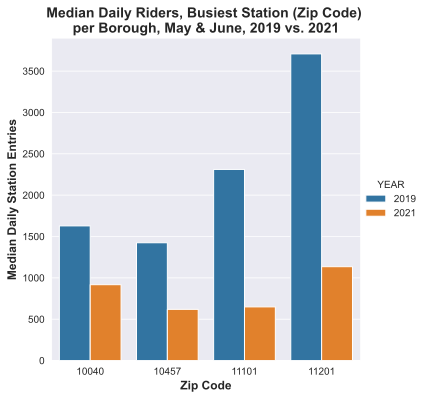

In [281]:
sns.set_style("darkgrid")
sns.catplot(x='ZIPCODE', y='NET_ENTRIES', hue='YEAR', data=busiest_top_stations_compare, kind='bar', ci=None)
plt.title('Median Daily Riders, Busiest Station (Zip Code) \nper Borough, May & June, 2019 vs. 2021', 
          fontdict={'weight': 'bold', 'fontsize': 14})
plt.xlabel("Zip Code", fontdict={'weight': 'bold', 'size': 12})
plt.ylabel("Median Daily Station Entries", fontdict={'weight': 'bold', 'size': 12});

In [318]:
# Create dataframe of relative % differences in ridership comparing the selected stations from 2019 to 2021

busiest_top_stations_relative = busiest_2019_top_stations.groupby('BOROUGH').sum().reset_index()
busiest_top_stations_relative['NET_ENTRIES'] = \
                    np.abs((busiest_2019_top_stations.groupby('BOROUGH').sum()['NET_ENTRIES'] -
                         compare_2021.groupby('BOROUGH').sum()['NET_ENTRIES']).values)
busiest_top_stations_relative['ZIPCODE'] = busiest_top_stations_relative['ZIPCODE'].astype('int')
busiest_top_stations_relative

,BOROUGH,NET_ENTRIES,WEEKDAY,ZIPCODE,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP,MEDIAN_INCOME_ALL_BOR,MEDIAN_INCOME_FAMILIES_BOR,YEAR
0,Bronx,805.0,1.0,10457,29767.0,38096.0,41432.0,50835.0,2019
1,Brooklyn,2573.0,1.0,11201,129248.0,176004.0,66937.0,74422.0,2019
2,Manhattan,710.5,1.0,10040,49677.0,56530.0,93651.0,126690.0,2019
3,Queens,1662.0,1.0,11101,75581.0,82636.0,73696.0,82534.0,2019


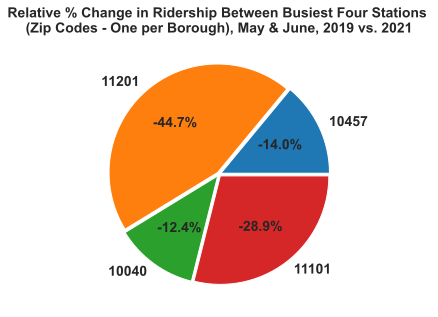

In [329]:
plt.figure(figsize=(5,5))
plt.pie(x=busiest_top_stations_relative['NET_ENTRIES'], 
        labels=busiest_top_stations_relative['ZIPCODE'],
        explode = [0.02]*4,
        autopct="-%.1f%%",
        textprops={'fontsize': 14, 'fontweight': 'bold'})
plt.title('Relative % Change in Ridership Between Busiest Four Stations \n(Zip Codes - One per Borough), May & June, 2019 vs. 2021',
          fontdict={'weight': 'bold', 'size': 14});

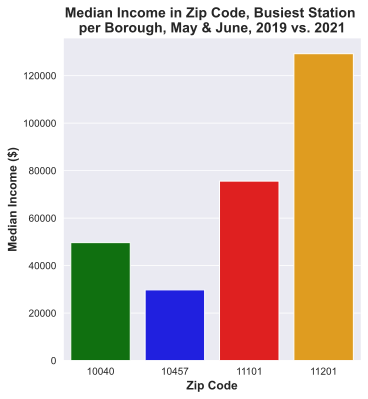

In [320]:
sns.set_style("darkgrid")
g = sns.catplot(x='ZIPCODE', y='MEDIAN_INCOME_ALL_ZIP', 
            data=busiest_top_stations_compare, kind='bar', 
            palette=['green', 'blue', 'red', 'orange'], ci=None)
plt.title('Median Income in Zip Code, Busiest Station \nper Borough, May & June, 2019 vs. 2021', 
          fontdict={'weight': 'bold', 'size': 14})
plt.xlabel("Zip Code", fontdict={'weight': 'bold', 'size': 12})
plt.ylabel("Median Income ($)", fontdict={'weight': 'bold', 'size': 12});

In [327]:
# Create dataframe of absolute % differences in ridership per selected station from 2019 to 2021

busiest_top_stations_absolute = busiest_2019_top_stations.groupby('BOROUGH').sum().reset_index()
busiest_top_stations_absolute['NET_ENTRIES'] = -100* \
           ((busiest_2019_top_stations.groupby('BOROUGH').sum()['NET_ENTRIES'] -
             compare_2021.groupby('BOROUGH').sum()['NET_ENTRIES']) / 
             busiest_2019_top_stations.groupby('BOROUGH').sum()['NET_ENTRIES']).values
busiest_top_stations_absolute['ZIPCODE'] = busiest_top_stations_absolute['ZIPCODE'].astype('int')
busiest_top_stations_absolute

,BOROUGH,NET_ENTRIES,WEEKDAY,ZIPCODE,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP,MEDIAN_INCOME_ALL_BOR,MEDIAN_INCOME_FAMILIES_BOR,YEAR
0,Bronx,-56.530899,1.0,10457,29767.0,38096.0,41432.0,50835.0,2019
1,Brooklyn,-69.390507,1.0,11201,129248.0,176004.0,66937.0,74422.0,2019
2,Manhattan,-43.642506,1.0,10040,49677.0,56530.0,93651.0,126690.0,2019
3,Queens,-71.916919,1.0,11101,75581.0,82636.0,73696.0,82534.0,2019


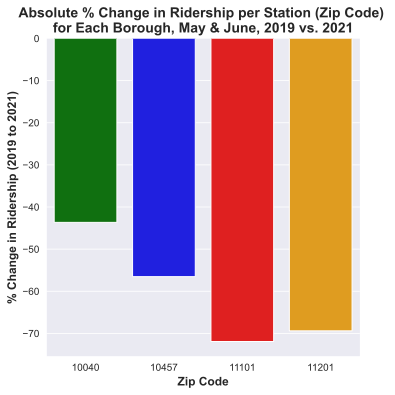

In [324]:
sns.set_style("darkgrid")
g = sns.catplot(x='ZIPCODE', y='NET_ENTRIES', 
            data=busiest_top_stations_absolute, kind='bar', 
            palette=['green', 'blue', 'red', 'orange'], ci=None)
plt.title('Absolute % Change in Ridership per Station (Zip Code) \nfor Each Borough, May & June, 2019 vs. 2021', 
          fontdict={'weight': 'bold', 'size': 14})
plt.xlabel("Zip Code", fontdict={'weight': 'bold', 'size': 12})
plt.ylabel("% Change in Ridership (2019 to 2021)", fontdict={'weight': 'bold', 'size': 12});

In [330]:
np.array([1,1]) + np.array([[1,2],[3,4]])

array([[2, 3],
       [4, 5]])

In [338]:
type(busiest_top_stations_absolute['BOROUGH'])

pandas.core.series.Series